# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store

# **Installing and Importing the necessary libraries**

In [ ]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [2]:
data = pd.read_csv('SuperKart.csv') ##  read the Train data

In [3]:
# Copy the dataset so that the original content is not altered
df = data.copy()

# **Data Overview**

In [ ]:
#### checking the shape of the data

In [5]:
df.shape

(8763, 12)

In [6]:
# Displaying the first few rows
df.head(10)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36
5,FD5680,12.03,Low Sugar,0.053,Snack Foods,113.64,OUT004,2009,Medium,Tier 2,Supermarket Type2,2629.15
6,FD5484,16.35,Low Sugar,0.112,Meat,185.71,OUT003,1999,Medium,Tier 1,Departmental Store,5081.14
7,NC5885,12.94,No Sugar,0.286,Household,194.75,OUT003,1999,Medium,Tier 1,Departmental Store,4494.62
8,FD1961,9.45,Low Sugar,0.047,Snack Foods,95.95,OUT002,1998,Small,Tier 3,Food Mart,1684.82
9,NC6657,8.94,No Sugar,0.045,Health and Hygiene,143.01,OUT004,2009,Medium,Tier 2,Supermarket Type2,2531.30


# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

In [11]:
# Function 1: Histogram and Boxplot Combination as it is most important for Univariate data analysis
def histogram_and_boxplot(data, feature, figsize=(15, 10), kde=False):
    """
    Plots a combination of boxplot and histogram for a given feature.

    Parameters:
    data : DataFrame
    feature : str
        The numerical feature to be plotted.
    figsize : tuple, default=(15, 10)
    kde : bool, default=False
        Whether to include a KDE curve on the histogram.
    """
    sns.set(style="whitegrid")
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )

    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True)

    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)

    # Mean and Median lines
    ax_hist.axvline(data[feature].mean(), linestyle="--", label='Mean')
    ax_hist.axvline(data[feature].median(), linestyle="-", label='Median')
    ax_hist.legend()
    plt.tight_layout()
    plt.show()
    plt.close()

In [23]:
def categorical_countplot_with_pct(data, column, figsize=(8, 4)):
    """
    Count plot with percentage annotations for a categorical feature.
    """

    plt.figure(figsize=figsize)
    order = data[column].value_counts().index
    ax = sns.countplot(y=data[column], order=order)

    total = len(data[column])
    for p in ax.patches:
        percentage = f'{100 * p.get_width() / total:.1f}%'
        ax.annotate(
            percentage,
            (p.get_width(), p.get_y() + p.get_height() / 2),
            ha='left',
            va='center'
        )

    plt.title(f"Count Plot of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

In [12]:
def correlation_heatmap(data, figsize=(14, 10), annot=False, cmap="RdBu_r"):
    """
    Displays a static correlation heatmap using Seaborn/Matplotlib.
    
    Parameters:
    - data: pandas DataFrame
    - figsize: tuple, figure size
    - annot: bool, whether to annotate correlation values on the heatmap
    - cmap: str, colormap for heatmap
    """
    # Select only numeric columns
    num_cols = data.select_dtypes(include=['number'])
    if num_cols.shape[1] == 0:
        print("No numeric columns found in the dataset.")
        return

    # Compute correlation matrix
    corr = num_cols.corr()

    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr, 
        annot=annot, 
        fmt=".2f" if annot else "",
        cmap=cmap, 
        center=0, 
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )
    plt.title("Correlation Heatmap", fontsize=16, pad=20)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [14]:
# Function 3: Correlation Heatmap
def correlation_heatmap(data):
    """
    Displays a correlation matrix heatmap for numeric features only 
    (both integer and float types).

    Parameters:
    data : DataFrame
    """
    # Select only numeric columns (int + float)
    num_cols = data.select_dtypes(include=['number'])
    
    # Check if there are numeric columns
    if num_cols.shape[1] == 0:
        print("No numeric columns found in the dataset.")
        return
    
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix of Numeric Features")
    plt.show()

In [15]:
# Function 4: Stacked bar chart
def plot_stacked_bar_chart(data, predictor_column, target_column):
    """
    Generates a stacked bar chart showing the distribution of a target variable 
    across different categories of a predictor variable.

    Parameters:
    data (DataFrame): Input dataset.
    predictor_column (str): Column name of the predictor (categorical) variable.
    target_column (str): Column name of the target (categorical) variable.
    """
    # Ensure both columns exist in the dataset
    if predictor_column not in data.columns or target_column not in data.columns:
        print(f"Columns '{predictor_column}' or '{target_column}' not found in dataset.")
        return
    
    # Create normalized crosstab (row-wise percentages)
    target_order = data[target_column].value_counts().index[-1]
    category_distribution = (
        pd.crosstab(data[predictor_column], data[target_column], normalize='index')
        .sort_values(by=target_order, ascending=False)
    )
    
    # Print the category distribution table
    print(category_distribution)
    
    # Plot stacked bar chart
    category_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
    
    # Add labels and title
    plt.xlabel(predictor_column, fontsize=12)
    plt.ylabel('Proportion', fontsize=12)
    plt.title(f'Distribution of {target_column} by {predictor_column}', fontsize=14)
    plt.legend(title=target_column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Display the plot
    plt.show()

In [18]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Product_Weight', 'Product_Allocated_Area', 'Product_MRP',
       'Store_Establishment_Year', 'Product_Store_Sales_Total'],
      dtype='object')

Now plotting feature: Product_Weight


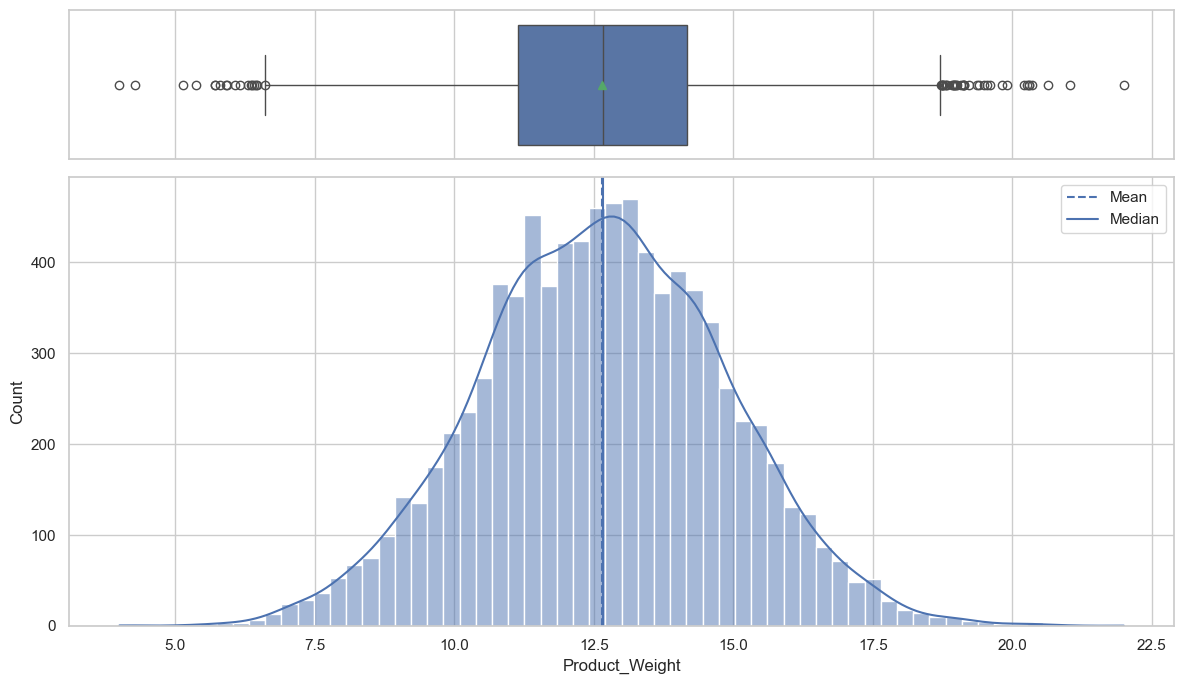


Now plotting feature: Product_Allocated_Area


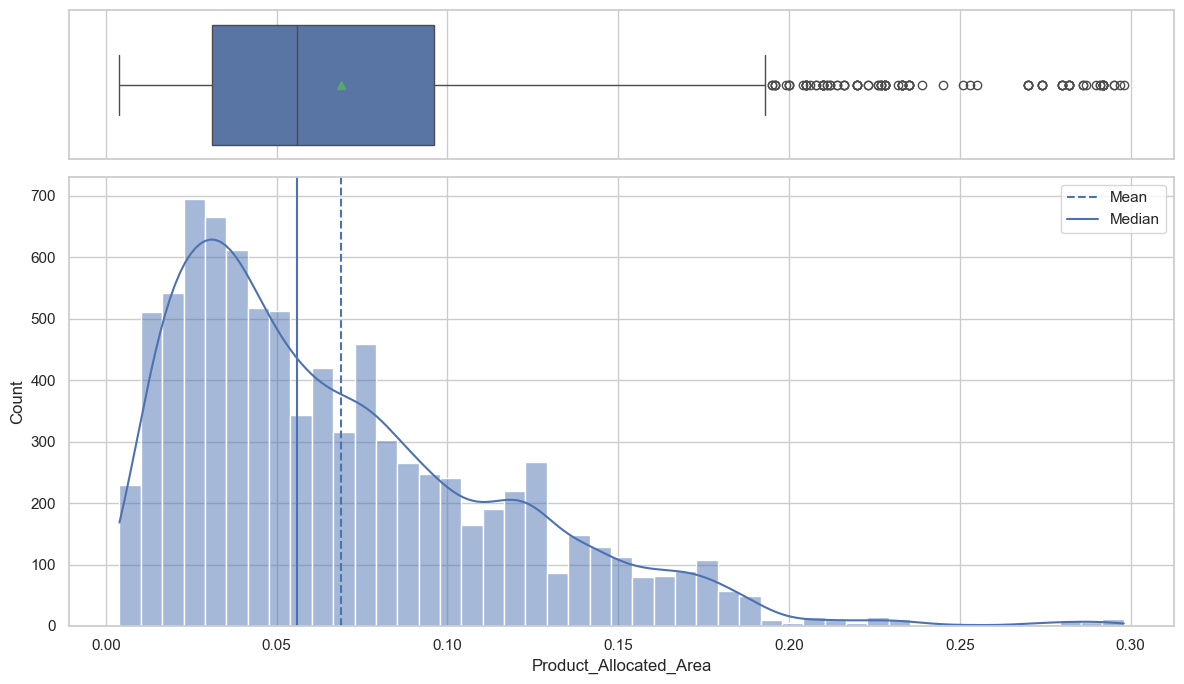


Now plotting feature: Product_MRP


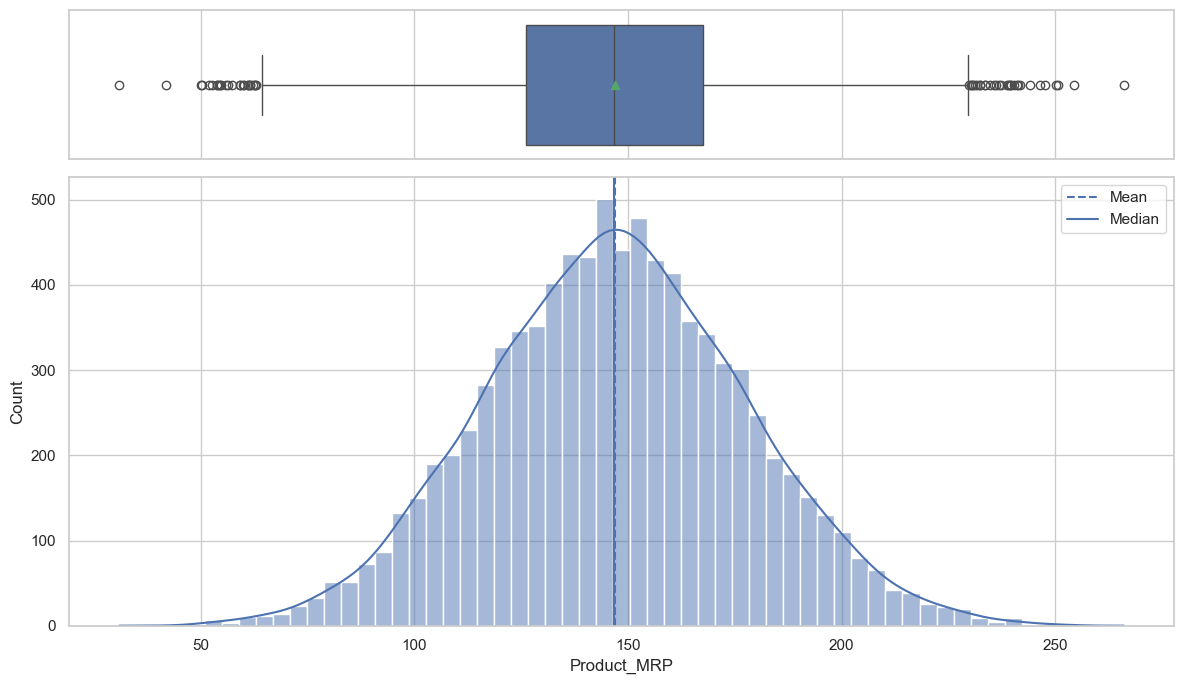


Now plotting feature: Store_Establishment_Year


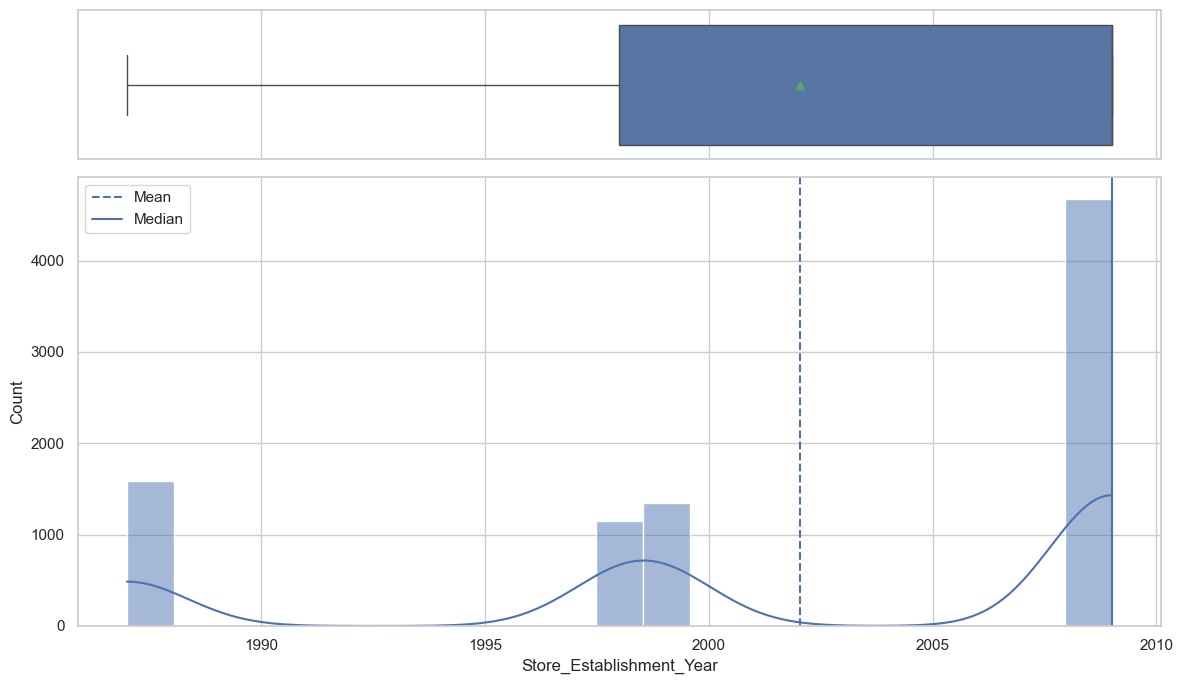


Now plotting feature: Product_Store_Sales_Total


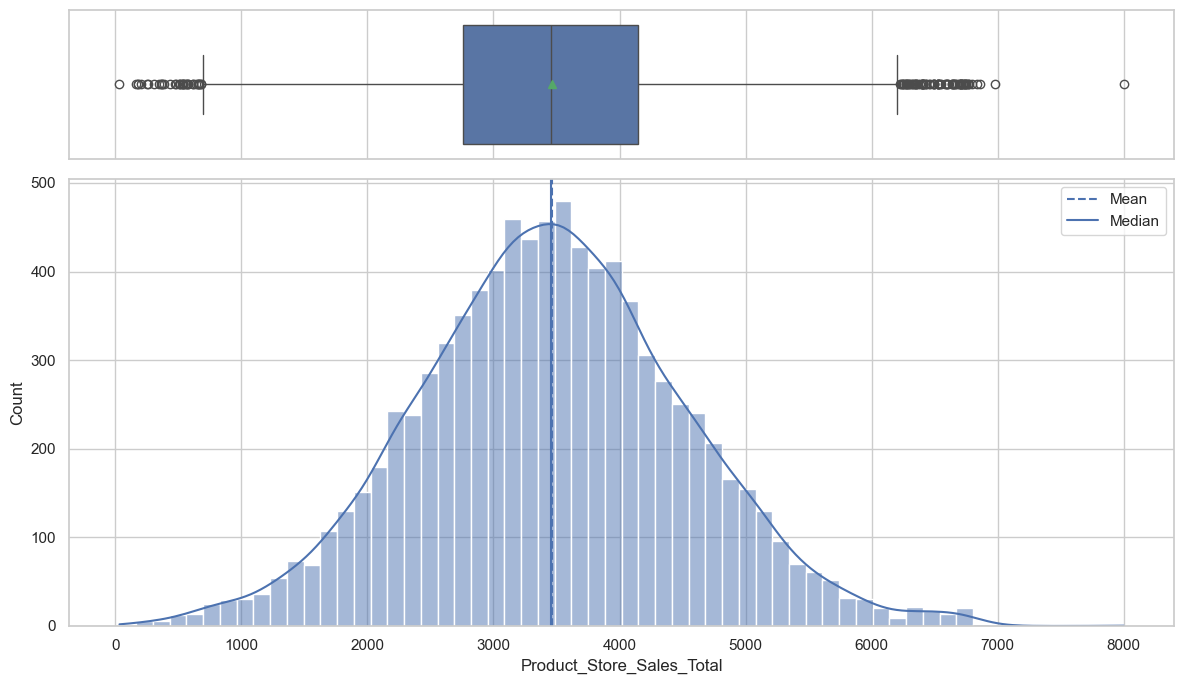

In [21]:
for feature in num_cols:
    print("="*80)
    print(f"Now plotting feature: {feature}")
    histogram_and_boxplot(df, feature, figsize=(12, 7), kde=True)
    print("="*80, "\n")

In [25]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Product_Id', 'Product_Sugar_Content', 'Product_Type', 'Store_Id',
       'Store_Size', 'Store_Location_City_Type', 'Store_Type'],
      dtype='object')


Univariate Analysis for: Product_Id


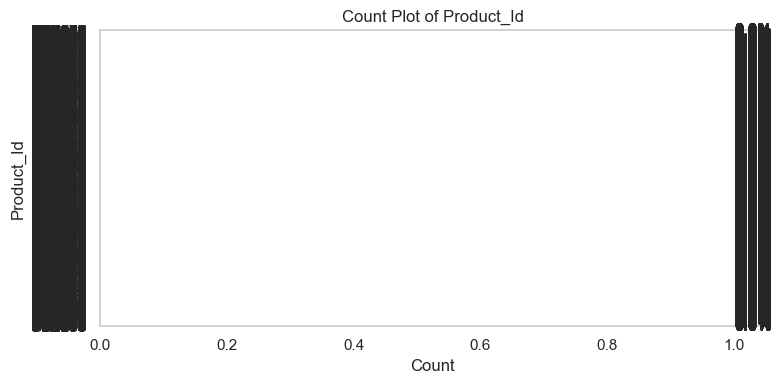


Univariate Analysis for: Product_Sugar_Content


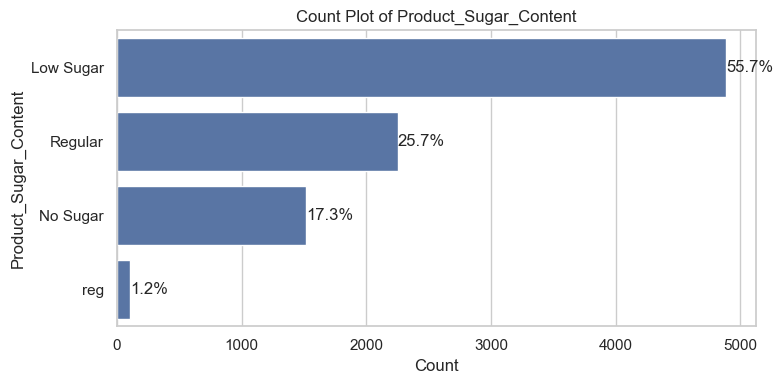


Univariate Analysis for: Product_Type


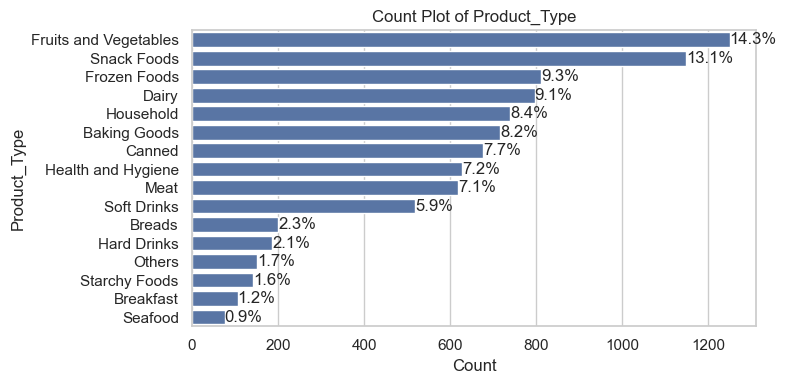


Univariate Analysis for: Store_Id


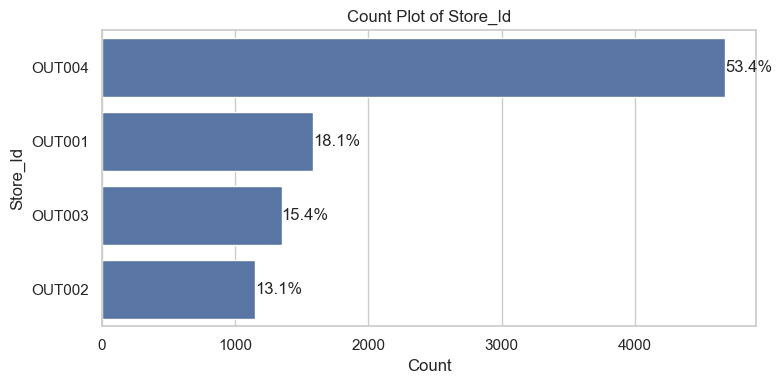


Univariate Analysis for: Store_Size


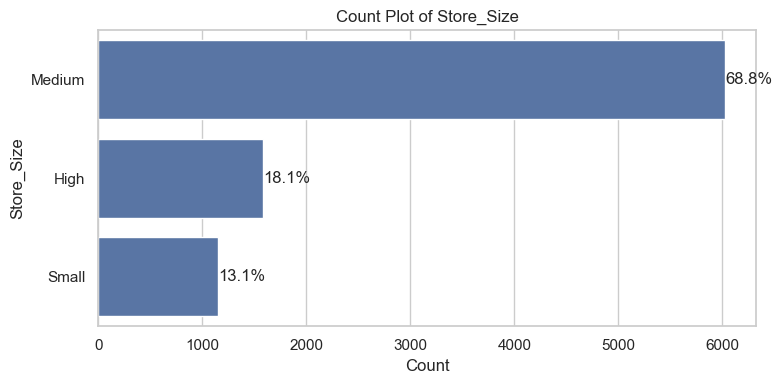


Univariate Analysis for: Store_Location_City_Type


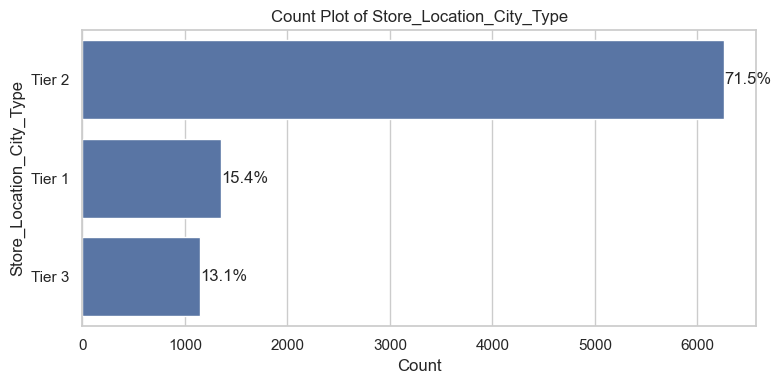


Univariate Analysis for: Store_Type


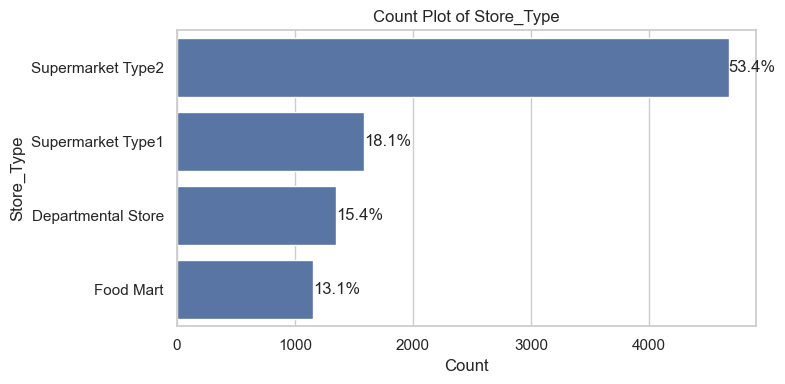

In [26]:
for col in cat_cols:
    print(f"\nUnivariate Analysis for: {col}")
    categorical_countplot_with_pct(df, col)

## Bivariate Analysis

In [28]:
def numerical_vs_target(data, feature, target, figsize=(6, 4)):
    """
    Scatter plot of a numerical feature vs target variable.

    Parameters:
    ----------
    data : pandas.DataFrame
    feature : str
        Numerical feature name
    target : str
        Target variable name
    figsize : tuple
    """

    plt.figure(figsize=figsize)
    sns.scatterplot(
        x=data[feature],
        y=data[target],
        alpha=0.6
    )
    sns.regplot(
        x=data[feature],
        y=data[target],
        scatter=False,
        color='red'
    )

    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

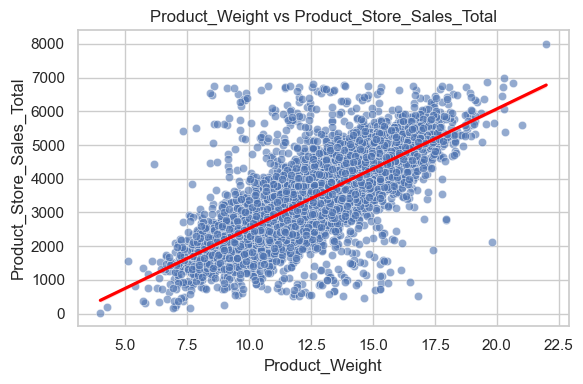

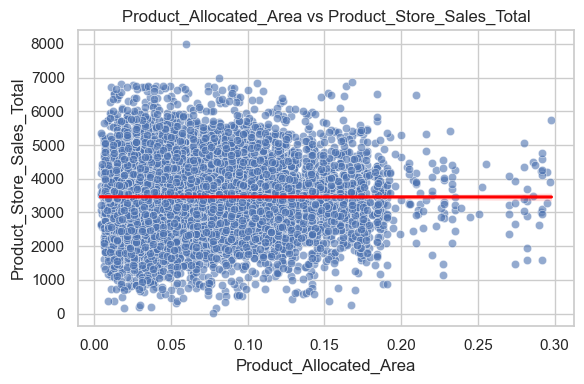

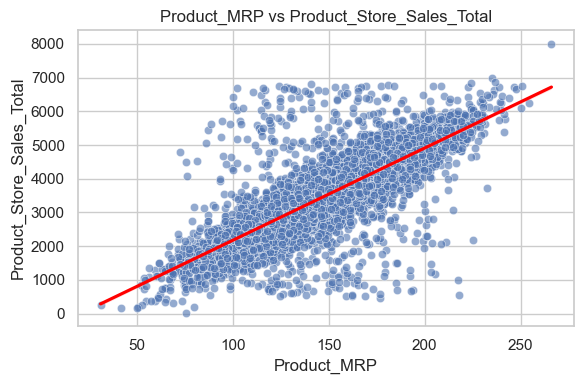

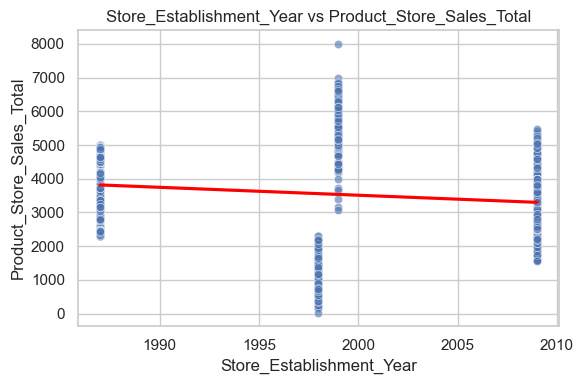

In [29]:
target = 'Product_Store_Sales_Total'

for col in num_cols:
    if col != target:
        numerical_vs_target(df, col, target)

In [30]:
def categorical_vs_target(data, feature, target, figsize=(8, 4)):
    """
    Boxplot of target variable across categories.

    Parameters:
    ----------
    data : pandas.DataFrame
    feature : str
        Categorical feature name
    target : str
        Target variable name
    figsize : tuple
    """

    plt.figure(figsize=figsize)
    sns.boxplot(
        x=data[feature],
        y=data[target]
    )

    plt.title(f"{target} by {feature}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

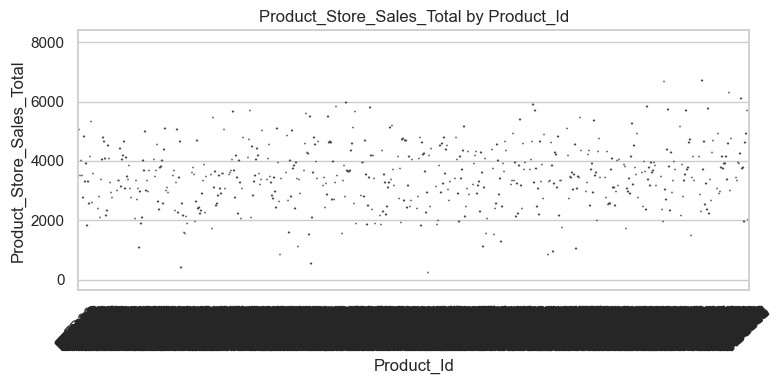

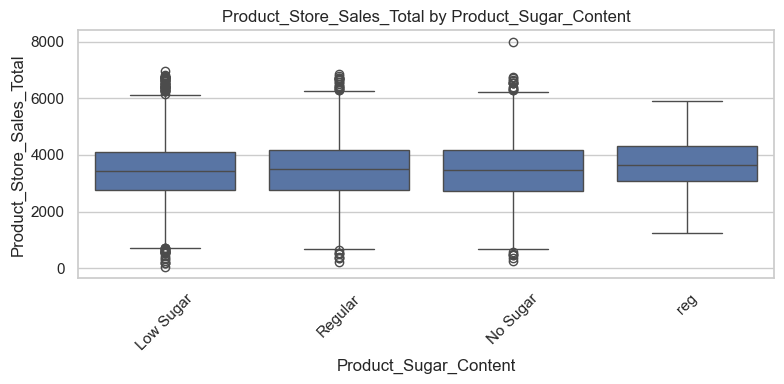

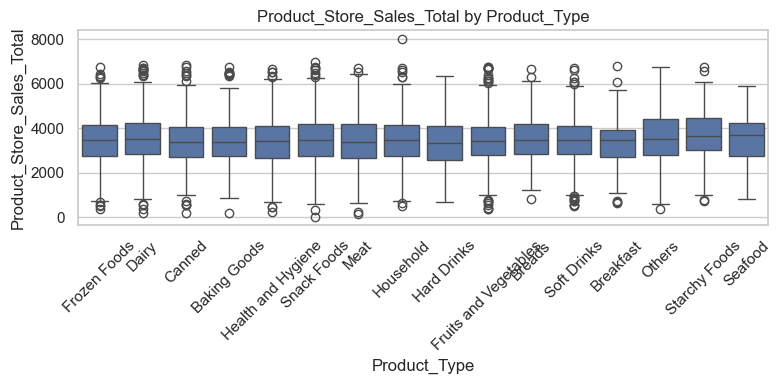

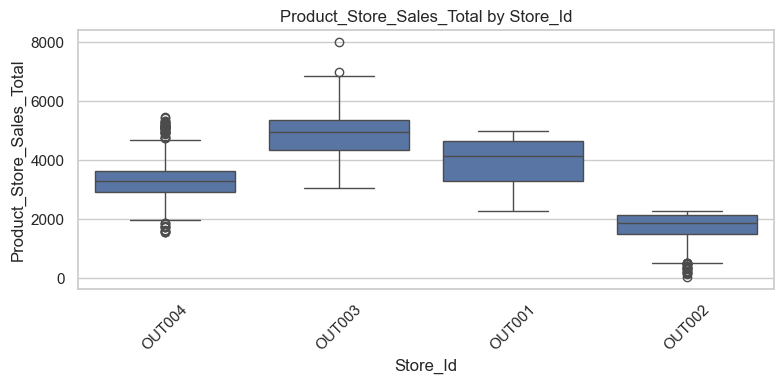

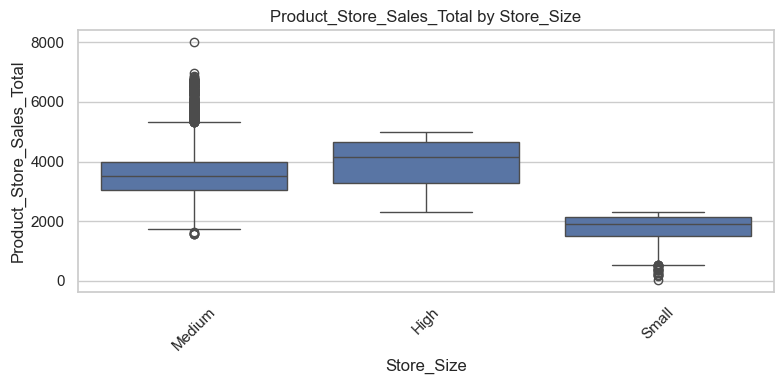

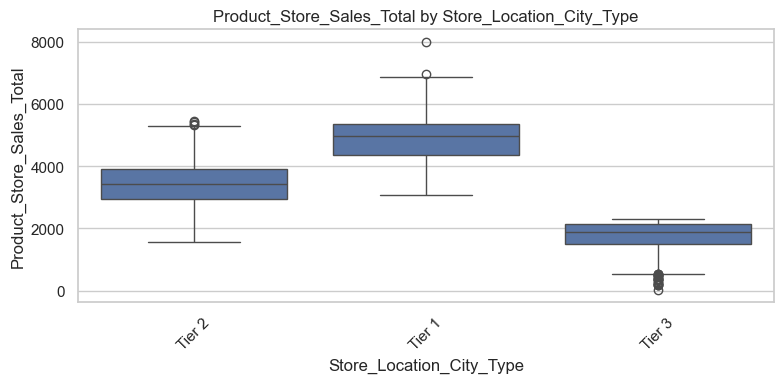

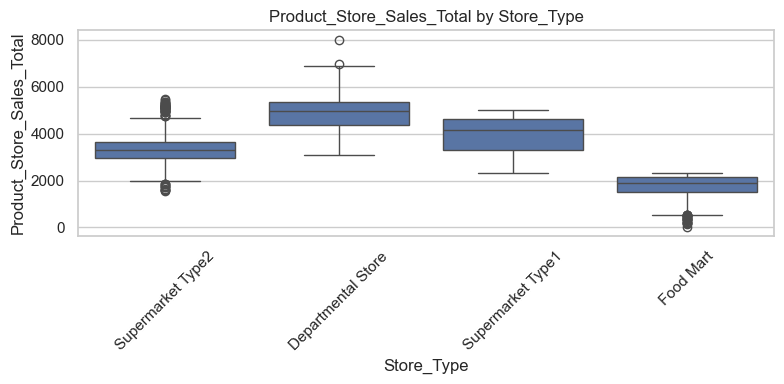

In [31]:
for col in cat_cols:
    categorical_vs_target(df, col, target)

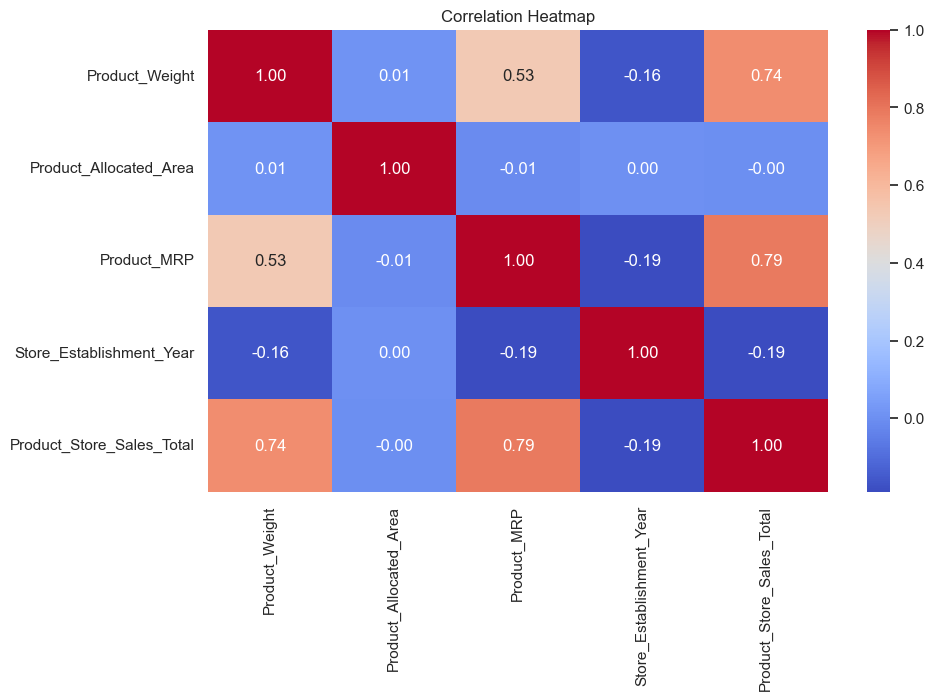

In [32]:
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=['int64', 'float64']).corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

# **Data Preprocessing**

### Outlier Detection & Treatment

In [37]:
# Identify Numerical Columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Product_Weight', 'Product_Allocated_Area', 'Product_MRP',
       'Store_Establishment_Year', 'Product_Store_Sales_Total'],
      dtype='object')

In [38]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return data[(data[column] < lower) | (data[column] > upper)]

In [39]:
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {outliers.shape[0]} outliers")

Product_Weight: 54 outliers
Product_Allocated_Area: 104 outliers
Product_MRP: 57 outliers
Store_Establishment_Year: 0 outliers
Product_Store_Sales_Total: 119 outliers


✅ Treatment Decision

Sales and pricing variables naturally have extreme values

Removing them would remove real business signals

Tree-based models are robust to outliers

📌 Rationale (Markdown – paste this)

“Although outliers were observed in numerical features, they represent genuine business scenarios such as high sales or premium products. Since tree-based models are robust to outliers, no outlier treatment was applied.”

In [40]:
df_model = df.drop(columns=['Product_Id'])

In [41]:
X = df_model.drop(columns=['Product_Store_Sales_Total'])
y = df_model['Product_Store_Sales_Total']

In [48]:
#from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

# 70% Train, 15% Validation, 15% Test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42
)

print(X_train.shape, X_val.shape, X_test.shape)

(6134, 10) (1314, 10) (1315, 10)


Preprocessing Pipeline (Encoding + Scaling)

This is VERY IMPORTANT for scoring well.

In [49]:
# Identify Feature Types
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

categorical_cols, numerical_cols

(Index(['Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size',
        'Store_Location_City_Type', 'Store_Type'],
       dtype='object'),
 Index(['Product_Weight', 'Product_Allocated_Area', 'Product_MRP',
        'Store_Establishment_Year'],
       dtype='object'))

In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [44]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

📌 Rationale (Markdown – paste this)

“Numerical features are scaled using StandardScaler, while categorical features are encoded using OneHotEncoder. A ColumnTransformer is used to ensure consistent preprocessing during both training and inference.”

# **Model Building**

## Define functions for Model Evaluation

In [53]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

- SuperKart dataset has:
- Mixed numerical + categorical (one-hot encoded) features
- Non-linear relationships
- Outliers that should not be aggressively removed
- A continuous target (regression)

Tree-based ensemble models are ideal here.
| Model         | Purpose                          |
| ------------- | -------------------------------- |
| Random Forest | Strong baseline, easy to explain |
| XGBoost       | Advanced, high-performance model |

In [55]:
## random forest 
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

In [57]:
rf_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [58]:
rf_train_perf = model_performance_regression(
    rf_model, X_train, y_train
)
rf_train_perf['Dataset'] = 'Train'
rf_train_perf['Model'] = 'Random Forest'

In [59]:
rf_val_perf = model_performance_regression(
    rf_model, X_val, y_val
)
rf_val_perf['Dataset'] = 'Validation'
rf_val_perf['Model'] = 'Random Forest'

#### XGBoost Model (Pipeline)

In [60]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective='reg:squarederror'
    ))
])

In [61]:
xgb_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [62]:
xgb_train_perf = model_performance_regression(
    xgb_model, X_train, y_train
)
xgb_train_perf['Dataset'] = 'Train'
xgb_train_perf['Model'] = 'XGBoost'

In [63]:
xgb_val_perf = model_performance_regression(
    xgb_model, X_val, y_val
)
xgb_val_perf['Dataset'] = 'Validation'
xgb_val_perf['Model'] = 'XGBoost'

In [65]:
model_comparison = pd.concat([
    rf_train_perf, rf_val_perf,
    xgb_train_perf, xgb_val_perf
], ignore_index=True)

model_comparison

,RMSE,MAE,R-squared,Adj. R-squared,MAPE,Dataset,Model
0,107.230726,40.433691,0.989872,0.989855,0.015263,Train,Random Forest
1,259.282802,99.561747,0.938695,0.938224,0.036389,Validation,Random Forest
2,177.165875,76.267681,0.972352,0.972307,0.028329,Train,XGBoost
3,269.295121,115.948554,0.933869,0.933361,0.042745,Validation,XGBoost


# **Model Performance Improvement - Hyperparameter Tuning**

In [66]:
from sklearn.model_selection import RandomizedSearchCV

rf_param_grid = {
    'model__n_estimators': [200, 300, 500],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']
}

In [67]:
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'model__max_depth': [None, 10, ...], 'model__max_features': ['sqrt', 'log2'], 'model__min_samples_leaf': [1, 2, ...], 'model__min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [68]:
best_rf_model = rf_random_search.best_estimator_
rf_random_search.best_params_

{'model__n_estimators': 200,
 'model__min_samples_split': 5,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': 20}

In [69]:
rf_tuned_train = model_performance_regression(
    best_rf_model, X_train, y_train
)
rf_tuned_train['Dataset'] = 'Train'
rf_tuned_train['Model'] = 'Random Forest (Tuned)'

rf_tuned_val = model_performance_regression(
    best_rf_model, X_val, y_val
)
rf_tuned_val['Dataset'] = 'Validation'
rf_tuned_val['Model'] = 'Random Forest (Tuned)'

### Hyperparameter Tuning – XGBoost

In [71]:
# Parameter Grid
xgb_param_grid = {
    'model__n_estimators': [300, 500, 800],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0]
}

In [72]:
# Randomized Search
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

xgb_random_search.fit(X_train, y_train)

,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'model__colsample_bytree': [0.7, 0.8, ...], 'model__learning_rate': [0.01, 0.05, ...], 'model__max_depth': [3, 5, ...], 'model__n_estimators': [300, 500, ...], ...}"
,n_iter,20
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [73]:
best_xgb_model = xgb_random_search.best_estimator_
xgb_random_search.best_params_

{'model__subsample': 0.8,
 'model__n_estimators': 500,
 'model__max_depth': 5,
 'model__learning_rate': 0.01,
 'model__colsample_bytree': 1.0}

In [74]:
xgb_tuned_train = model_performance_regression(
    best_xgb_model, X_train, y_train
)
xgb_tuned_train['Dataset'] = 'Train'
xgb_tuned_train['Model'] = 'XGBoost (Tuned)'

xgb_tuned_val = model_performance_regression(
    best_xgb_model, X_val, y_val
)
xgb_tuned_val['Dataset'] = 'Validation'
xgb_tuned_val['Model'] = 'XGBoost (Tuned)'

#### Consolidated Comparison (Before vs After Tuning)

In [75]:
tuned_model_comparison = pd.concat([
    rf_train_perf, rf_val_perf,
    rf_tuned_train, rf_tuned_val,
    xgb_train_perf, xgb_val_perf,
    xgb_tuned_train, xgb_tuned_val
], ignore_index=True)

tuned_model_comparison

,RMSE,MAE,R-squared,Adj. R-squared,MAPE,Dataset,Model
0,107.230726,40.433691,0.989872,0.989855,0.015263,Train,Random Forest
1,259.282802,99.561747,0.938695,0.938224,0.036389,Validation,Random Forest
2,191.411180,105.425521,0.967727,0.967674,0.041500,Train,Random Forest (Tuned)
3,297.686532,171.586123,0.919189,0.918569,0.067084,Validation,Random Forest (Tuned)
4,177.165875,76.267681,0.972352,0.972307,0.028329,Train,XGBoost
5,269.295121,115.948554,0.933869,0.933361,0.042745,Validation,XGBoost
6,258.741364,108.382824,0.941029,0.940933,0.042449,Train,XGBoost (Tuned)
7,263.550729,116.841724,0.936660,0.936174,0.044737,Validation,XGBoost (Tuned)


Based on validation performance and generalization capability, the **tuned XGBoost model** is selected as the final model for **evaluation on the test dataset** and for **deployment**.

# **Model Performance Comparison, Final Model Selection, and Serialization**

In [76]:
xgb_test_perf = model_performance_regression(
    best_xgb_model, X_test, y_test
)

xgb_test_perf['Dataset'] = 'Test'
xgb_test_perf['Model'] = 'XGBoost (Final)'

xgb_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE,Dataset,Model
0,301.645295,127.166879,0.922528,0.921934,0.048946,Test,XGBoost (Final)


In [77]:
import joblib

model_path = "final_xgboost_model.pkl"
joblib.dump(best_xgb_model, model_path)

['final_xgboost_model.pkl']

In [78]:
loaded_model = joblib.load(model_path)

In [79]:
# Predict on Test Set
y_test_pred = loaded_model.predict(X_test)

In [80]:
loaded_model_test_perf = model_performance_regression(
    loaded_model, X_test, y_test
)

loaded_model_test_perf['Dataset'] = 'Test'
loaded_model_test_perf['Model'] = 'XGBoost (Reloaded)'

loaded_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE,Dataset,Model
0,301.645295,127.166879,0.922528,0.921934,0.048946,Test,XGBoost (Reloaded)


The reloaded model produces **identical performance metrics** on the test dataset, confirming **successful serialization** and **reproducibility** of the final model.

# **Deployment - Backend**

## Flask Web Framework


In [92]:
import os
import shutil
os.makedirs("backend_files", exist_ok=True)
os.makedirs("backend_files/model", exist_ok=True)

# 2. Extract the filename and join it with the destination directory
destination = os.path.join("backend_files/model", os.path.basename(model_path))

shutil.copy2(model_path, destination)


os.makedirs("frontend_files", exist_ok=True)

In [82]:
%%writefile backend_files/app.py
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load serialized model
model = joblib.load("model/final_xgboost_model.pkl")

@app.route("/")
def home():
    return "SuperKart Sales Prediction API is running"

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json()
        input_df = pd.DataFrame([data])

        prediction = model.predict(input_df)[0]

        return jsonify({
            "predicted_product_store_sales": round(float(prediction), 2)
        })

    except Exception as e:
        return jsonify({"error": str(e)})

Writing backend_files/app.py


## Dependencies File

In [83]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.28.1
uvicorn[standard]
streamlit==1.43.2

Writing backend_files/requirements.txt


## Dockerfile

In [84]:
%%writefile backend_files/Dockerfile
FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy all files from backend_files directory to container
COPY . .

# Install dependencies
RUN pip install --no-cache-dir --upgrade -r requirements.txt

# Start Flask app using Gunicorn
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:app"]

Writing backend_files/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

In [ ]:
# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

access_key = ""  # Your Hugging Face token created from access keys in write mode
repo_id = "sabyasachighosh/customer_churn"  # Your Hugging Face space id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/Users/saghosh/demo_projects/Model_deployment/backend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

## Uploading Files to Hugging Face Space (Docker Space)

# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

In [88]:
%%writefile frontend_files/app.py

import streamlit as st
import requests
import pandas as pd

# =========================
# CONFIGURATION
# =========================
API_BASE_URL = "https://<your-backend-space>.hf.space"

st.set_page_config(
    page_title="SuperKart Sales Prediction",
    layout="wide"
)

st.title("🛒 SuperKart Sales Prediction System")
st.markdown(
    "Predict product store sales using a trained XGBoost model. "
    "Supports both **single predictions** and **batch predictions via CSV upload**."
)

# =========================
# TABS
# =========================
tab1, tab2 = st.tabs(["🔹 Single Prediction", "📁 Batch Prediction (CSV)"])

# =========================
# SINGLE PREDICTION TAB
# =========================
with tab1:
    st.subheader("Single Record Prediction")

    with st.form("single_prediction_form"):
        col1, col2 = st.columns(2)

        with col1:
            Product_Weight = st.number_input("Product Weight", value=10.0)
            Product_Sugar_Content = st.selectbox(
                "Product Sugar Content",
                ["Low Sugar", "Regular"]
            )
            Product_Allocated_Area = st.number_input(
                "Product Allocated Area", value=100
            )
            Product_Type = st.selectbox(
                "Product Type",
                ["Dairy", "Beverages", "Snacks"]
            )
            Product_MRP = st.number_input("Product MRP", value=200)

        with col2:
            Store_Id = st.text_input("Store ID", "OUT049")
            Store_Establishment_Year = st.number_input(
                "Store Establishment Year", value=2000
            )
            Store_Size = st.selectbox(
                "Store Size", ["Small", "Medium", "High"]
            )
            Store_Location_City_Type = st.selectbox(
                "Store City Type", ["Tier 1", "Tier 2", "Tier 3"]
            )
            Store_Type = st.selectbox(
                "Store Type",
                ["Supermarket Type1", "Supermarket Type2"]
            )

        submit_single = st.form_submit_button("Predict Sales")

    if submit_single:
        payload = {
            "Product_Weight": Product_Weight,
            "Product_Sugar_Content": Product_Sugar_Content,
            "Product_Allocated_Area": Product_Allocated_Area,
            "Product_Type": Product_Type,
            "Product_MRP": Product_MRP,
            "Store_Id": Store_Id,
            "Store_Establishment_Year": Store_Establishment_Year,
            "Store_Size": Store_Size,
            "Store_Location_City_Type": Store_Location_City_Type,
            "Store_Type": Store_Type
        }

        with st.spinner("Predicting sales..."):
            response = requests.post(
                f"{API_BASE_URL}/v1/predict",
                json=payload
            )

        if response.status_code == 200:
            st.success(
                f"💰 Predicted Store Sales: ₹{response.json()['predicted_product_store_sales']}"
            )
        else:
            st.error("❌ Prediction failed. Please check input values.")

# =========================
# BATCH PREDICTION TAB
# =========================
with tab2:
    st.subheader("Batch Prediction via CSV Upload")

    uploaded_file = st.file_uploader(
        "Upload CSV file for batch prediction",
        type=["csv"]
    )

    if uploaded_file is not None:
        input_df = pd.read_csv(uploaded_file)

        st.markdown("### 📄 Uploaded Data Preview")
        st.dataframe(input_df.head())

        if st.button("Run Batch Prediction"):
            with st.spinner("Running batch prediction..."):
                files = {
                    "file": (
                        uploaded_file.name,
                        uploaded_file.getvalue(),
                        "text/csv"
                    )
                }

                response = requests.post(
                    f"{API_BASE_URL}/v1/predict/batch",
                    files=files
                )

            if response.status_code == 200:
                preds = response.json()["predictions"]

                pred_df = pd.DataFrame(preds)
                result_df = pd.concat(
                    [input_df.reset_index(drop=True), pred_df],
                    axis=1
                )

                st.success("✅ Batch prediction completed successfully!")
                st.dataframe(result_df)

                # Download predictions
                csv = result_df.to_csv(index=False).encode("utf-8")
                st.download_button(
                    label="📥 Download Predictions as CSV",
                    data=csv,
                    file_name="superkart_batch_predictions.csv",
                    mime="text/csv"
                )
            else:
                st.error("❌ Batch prediction failed.")

Overwriting frontend_files/app.py


## Dependencies File

In [86]:
%%writefile frontend_files/requirements.txt
pandas==2.2.2
requests==2.28.1
streamlit==1.43.2

Writing frontend_files/requirements.txt


## DockerFile

In [89]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Overwriting frontend_files/Dockerfile


## Uploading Files to Hugging Face Space (Streamlit Space)

In [ ]:
access_key = ""  # Your Hugging Face token created from access keys in write mode
repo_id = ""  # Your Hugging Face space id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/Users/saghosh/demo_projects/Model_deployment/frontend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

# **Actionable Insights and Business Recommendations**

-

-